<a href="https://colab.research.google.com/github/Vonewman/Algo/blob/master/Neural_Network_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network with pytorch

Pytorch gave a nice module **nn** that providesa nice way to efficiently build large neural networks.

In [0]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

## Download the MNIST datasets

In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [25]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


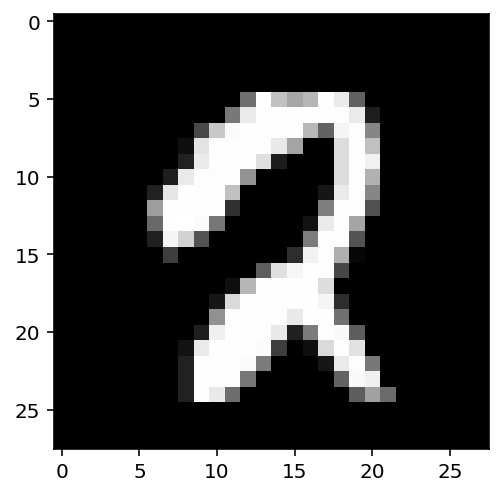

In [26]:
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r')

In [0]:
## Solution
def activation(x):
  return 1/(1 + torch.exp(-x))

# Flatten the input images 
inputs = images.view(images.shape[0], -1)

# create parameters 
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [28]:
# shape of the output
print(out.shape)

torch.Size([64, 10])


In [29]:
# output of this network
print(out)

tensor([[ 20.9417,  11.9547,   1.5298,   0.7255,  -4.9546,  -5.3452,  -6.8398,
          12.0256,  15.0232,  -1.8380],
        [ 12.8230,  12.9614,   8.3032,  -3.8748,  -8.2821,  -0.9074,   3.3647,
           1.2244,  13.9988,   5.8873],
        [ 26.7173,  15.0368,   6.4418,  13.0885,  -4.5063,   3.5661,  -5.2339,
          16.2715,  13.6122,   2.9597],
        [  3.3661,   7.9795,   4.4847,   7.4412,  -5.8109,  10.9218, -13.7922,
           8.8491,  10.5595,   0.6791],
        [ 20.2037,   7.1463,   9.7384,  10.0504,  -2.2954,   0.5824,  -7.2638,
           8.2231,   9.8214,  -6.3777],
        [ 14.2601,   7.6277,  -1.2857,  10.4337, -13.5993,  11.4384,  -1.6426,
          13.3016,   2.9654,  -6.4255],
        [  9.5733,   2.7136,  11.8780,   7.8161,  -2.2446,   7.8337,   2.9555,
           1.4494,   7.8827,   9.3778],
        [  8.0974,  19.4608,  12.8232,   7.6610, -11.5898,   4.0942,  -7.4265,
          12.0808,   0.1833,   3.3032],
        [ 13.8293,  13.8868,  -0.2161,   7.8385,

In [30]:
## softmax
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)

print(probabilities.shape)

print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with Pytorch

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # Input to hidden layer Linear transformation
    self.hidden = nn.Linear(784, 256)

    # Output layer, 10 units - one from each digit
    self.output = nn.Linear(256, 10)

    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax()

  def forward(self, x):
    # Pass the input Tensor through each of the operation
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)

    return x

In [34]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=None)
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # Input to hidden layer Linear transformation
    self.hidden = nn.Linear(784, 256)

    # Output layer, 10 units - one from each digit
    self.output = nn.Linear(256, 10)

  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim=1)

    return x